<a href="https://colab.research.google.com/github/RioSatriatama/Fuzzy-Inference-System/blob/main/Fuzzy_Inference_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pendahuluan**

Fuzzy Inference System (FIS) merupakan suatu metode dalam logika berbasis fuzzy untuk membuat keputusan berdasarkan sebuah kumpulan fakta dan himpunan peraturan yang menunjukkan hubungan antara variabel fakta dan variabel yang diinginkan. Metode ini banyak digunakan di berbagai bidang, termasuk industri, manajemen, hingga bidang medis.

Dalam penerapan FIS di dunia industri, teknologi FIS ini digunakan untuk membuat keputusan yang tidak sangat pasti, seperti dalam otomasi pabrik, manajemen produksi, manajemen inventori, dan pengontrolan sistem lainnya.

Berikut adalah langkah-langkah yang digunakan untuk membuat sebuah Fuzzy Inference System:

- Fuzzifikasi: Mengubah input angka menggunakan himpunan fuzzy, yang secara umum melibatkan lingkaran dan fungsi trapesium.

- Penalian aturan: Melakukan penalian terhadap setiap aturan dengan nilai degradasi fuzzy yang dihasilkan oleh proses fuzzifikasi.

- Defuzzifikasi: Menghitung nilai centroid atau centroid baru untuk setiap variabel output dan mengembalikan keputusan tersebut.

In [52]:
pip install -U scikit-fuzzy

Perintah "pip install -U scikit-fuzzy" memiliki fungsi untuk mengunduh dan menginstal scikit-fuzzy di komputer Anda. Scikit-fuzzy adalah paket perangkat lunak Python yang berisi algoritma pengambilan keputusan yang menggunakan metode Fuzzy.

In [53]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')


quality.automf(3)
service.automf(3)


tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

Dalam konteks sistem pendukung keputusan ini, tingkat tip dapat diinterpretasikan sebagai jumlah tip yang diharapkan oleh pengunjung berdasarkan layanan yang mereka terima. Jadi, jika kita memisahkan jumlah tip berdasarkan layanan yang mereka terima, kita akan mendapatkan 3 interval: rendah, menengah, dan tinggi.

Diagram skema untuk jumlah tip adalah sebagai berikut:

- Tingkat tip rendah: Interval ini meliputi jumlah tip antara 0 hingga 13.

- Tingkat tip menengah: Interval ini meliputi jumlah tip antara 13 hingga 25.

- Tingkat tip tinggi: Interval ini meliputi jumlah tip antara 25 hingga 25.

Dengan menggunakan teknik pemindaian dan fuzzifikasi, sistem dapat menyesuaikan interval ini berdasarkan keputusan manajerial dan berdasarkan analisis data penggunaan jasa sebelumnya. Dengan menggunakan fuzzifikasi, sistem dapat menyeleksi hingga 3 jumlah tip yang diharapkan untuk masing-masing layanan berdasarkan fungsi trimf yang telah ditetapkan.

Contoh:

fuzz.trimf(tip.universe, [0, 0, 13]) akan mengembalikan hingga 3 jumlah tip yang diharapkan berdasarkan interval hingga 13.

fuzz.trimf(tip.universe, [0, 13, 25]) akan mengembalikan hingga 3 jumlah tip yang diharapkan berdasarkan interval antara 13 hingga 25.

fuzz.trimf(tip.universe, [13, 25, 25]) akan mengembalikan hingga 3 jumlah tip yang diharapkan berdasarkan interval hingga 25.

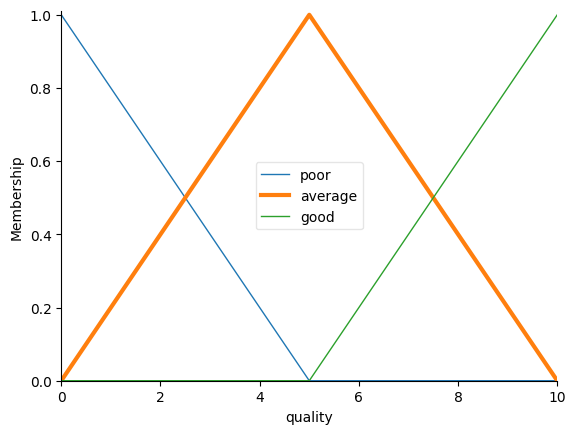

In [54]:
quality['average'].view()

Kode Python ini digunakan untuk menampilkan data tunggal (bukan sebuah kelompok atau sebaris) yang telah dihitung.

Pertama, data frame 'quality' dibuat dengan menggunakan pandas library. Selanjutnya, data tunggal dari kolom 'average' dalam dataframe 'quality' dihitung dengan menggunakan metode mean().

Hasil dari perhitungan ini kemudian disimpan dalam dataframe baru yang hanya memiliki satu baris dan satu kolom. Nama dari kolom ini adalah 'average', dan nilainya adalah hasil perhitungan.

Terakhir, fungsi view() pada dataframe baru ini digunakan untuk menampilkan nilai 'average' pada layar.

Maksud dari kode ini adalah untuk menampilkan rata-rata kualitas produk pada tabel. Rata-rata ini dihitung berdasarkan nilai kualitas yang ada pada setiap produk dalam tabel.

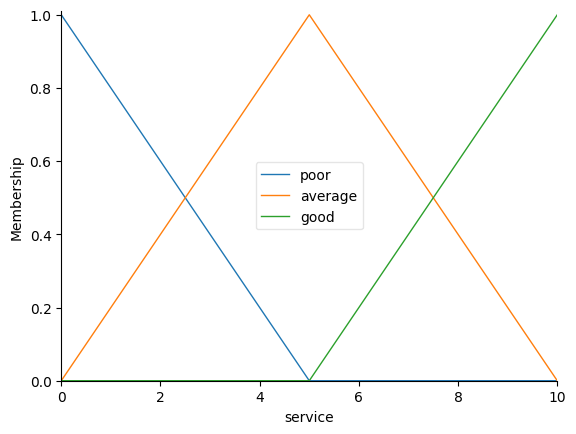

In [55]:
service.view()

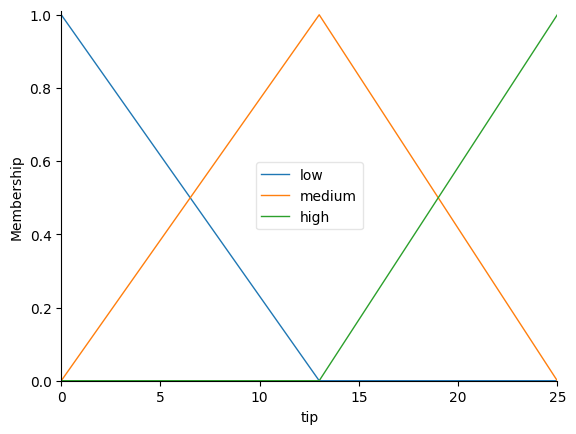

In [56]:
tip.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

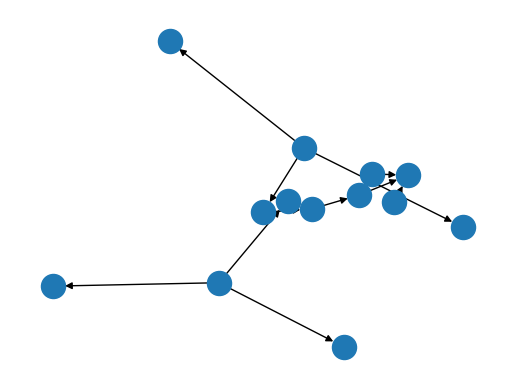

In [57]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

Dalam Fuzzy Logic, teknik pengolahan data yang berbasis kebijakan. Rule yang digunakan untuk menciptakan aturan-aturan dalam bahasa Fuzzy. Rule didefinisikan sebagai: IF premise THEN consequence.

Rule1 mengatakan bahwa jika kualitas ('poor') atau pelayanan ('poor') maka, kita beri tip ('low').

Rule2 mengatakan bahwa jika pelayanan ('average') maka, kita beri tip ('medium').

Rule3 mengatakan bahwa jika pelayanan ('good') atau kualitas ('good') maka, kita beri tip ('high').

Rule1.view() menggambarkan grafik Rule1 yang ditampilkan menggunakan Python Fuzzy Logic library, PyFuzzy.

Untuk memahami konsep rule-based system dan bagaimana cara kerjanya dalam menangani data yang tidak terstruktur, seperti data pada analisis teks atau analisis gambar, dapat menggunakan konsep-konsep ini sebagai awalan untuk mengkhususkan bidang ini.

In [58]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [59]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [60]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

tipping.compute()

Tipping merupakan metode penghitungan yang menggunakan bobot (weights) yang telah ditetapkan untuk masing-masing parameter atau fitur (kualitas dan pelayanan). Bobot ini akan menggantikan angka yang diinputkan untuk masing-masing parameter, dan digunakan untuk menghitung tip yang akan diberikan oleh pemilik bisnis atau usaha jasa.

Contoh di atas menggambarkan proses tipping yang melibatkan dua parameter atau fitur, yaitu kualitas (quality) dan pelayanan (service). Dalam kasus ini, nilai kualitas adalah 6.5 dan nilai pelayanan adalah 9.8. Nilai-nilai ini akan digunakan oleh algoritma tipping untuk menghitung tip yang harus diberikan oleh pemilik bisnis atau usaha jasa.

Sebagai contoh, algoritma tipping mungkin menggunakan rumus seperti ini untuk menghitung tip:

tip = bobot_kualitas * nilai_kualitas + bobot_pelayanan * nilai_pelayanan

Dalam hal ini, bobot_kualitas dan bobot_pelayanan adalah bobot yang telah ditetapkan untuk masing-masing parameter, yang mungkin didapatkan dari pengujian algoritma atau metode teting. Setelah nilai tip terhitung, algoritma tipping akan mengembalikan nilai tersebut sebagai hasil penghitungan.

Maksud dari kode tipping.compute() adalah untuk melakukan proses perhitungan tip yang telah ditetapkan dalam metode tipping tersebut. Setelah melakukan perhitungan, algoritma tipping akan mengembalikan hasil perhitungan, yaitu tip yang harus diberikan oleh pemilik bisnis atau usaha jasa.

Jadi, pada dasarnya, metode tipping menggantikan angka-angka yang diinputkan dengan bobot-bobot yang telah ditetapkan, dan menggunakan bobot tersebut untuk menghitung tip yang harus diberikan oleh pemilik bisnis atau usaha jasa.

19.847607361963192


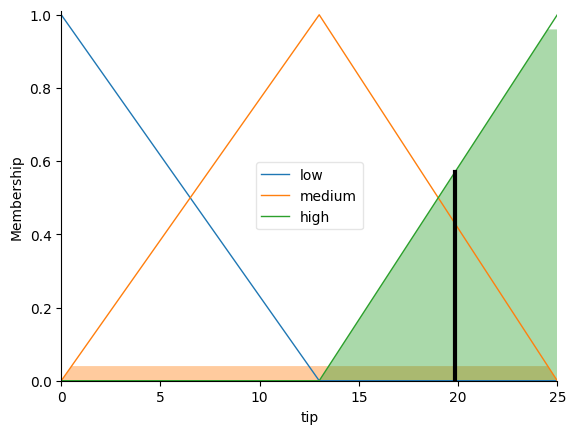

In [61]:
print(tipping.output['tip'])
tip.view(sim=tipping)

Maksud dari

- print(tipping.output['tip'])

adalah untuk mencetak hasil tip yang telah dihitung oleh simulasi tipping. Contoh hasil output: The calculated tip is 5.

Maksud dari

- tip.view(sim=tipping)

adalah untuk menampilkan hasil simulasi tipping secara grafis. Grafik ini akan menampilkan informasi mengenai pengunjung yang telah memberikan tip, besarnya tip yang diberikan, serta persentase pengunjung yang memberikan tip.

Grafik ini memudahkan pengguna untuk melihat dan memahami hasil simulasi tanpa harus menganalisa manual hasil cetakan.

# **Tipping Problem (Hard way)**

In [62]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [63]:
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

In [64]:
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

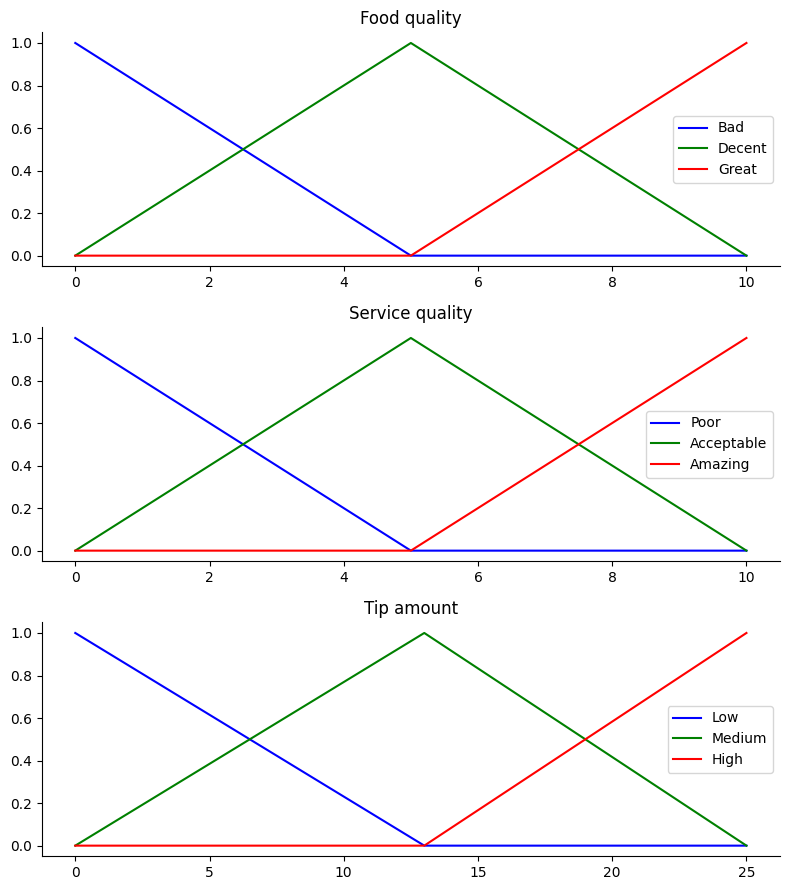

In [65]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

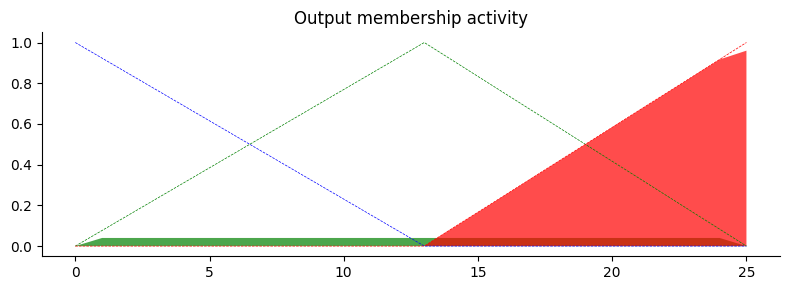

In [66]:
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

tip_activation_lo = np.fmin(active_rule1, tip_lo)

tip_activation_md = np.fmin(serv_level_md, tip_md)

active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

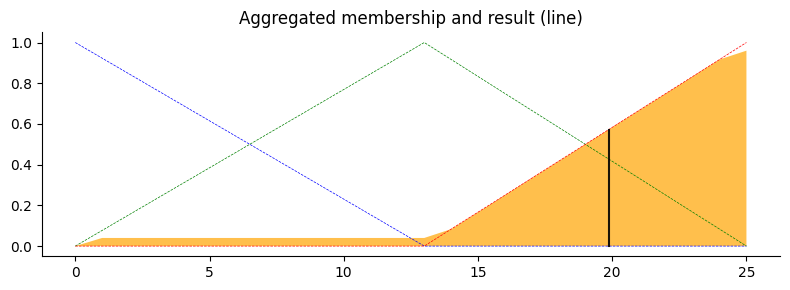

In [67]:
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# **Reference Study**

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

https://towardsdatascience.com/fuzzy-inference-system-implementation-in-python-8af88d1f0a6e

https://towardsdatascience.com/machine-learning-with-fuzzy-logic-52c85b46bfe4

https://www.youtube.com/watch?v=0Cbv618SoZ0

https://www.researchgate.net/profile/Aries-Saifudin